In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'

In [4]:
df = pd.read_csv(data)

In [5]:
df[['engine_displacement','horsepower','vehicle_weight','model_year']].isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
dtype: int64

In [6]:
median_horsepower = df['horsepower'].median()

print(f"The median horsepower is: {median_horsepower}")

The median horsepower is: 149.0


In [7]:
import matplotlib.pyplot as plt
import seaborn as sbn

%matplotlib inline

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

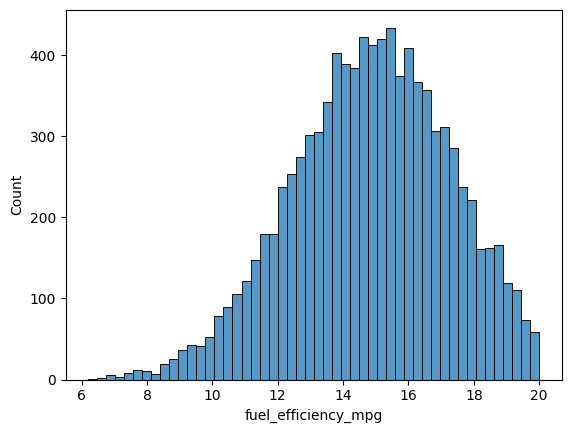

In [8]:
sbn.histplot(df.fuel_efficiency_mpg[df.fuel_efficiency_mpg < 20], bins = 50)

In [9]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

engine_displacement
[170 130 220 210 190]
36

num_cylinders
[ 3.  5. nan  4.  1.]
14

horsepower
[159.  97.  78.  nan 140.]
192

vehicle_weight
[3413.43375861 3149.66493422 3079.03899737 2542.39240183 3460.87098999]
9704

acceleration
[17.7 17.8 15.1 20.2 14.4]
162

model_year
[2003 2007 2018 2009 2008]
24

origin
['Europe' 'USA' 'Asia']
3

fuel_type
['Gasoline' 'Diesel']
2

drivetrain
['All-wheel drive' 'Front-wheel drive']
2

num_doors
[ 0.  2. -1.  1. nan]
9

fuel_efficiency_mpg
[13.23172891 13.68821744 14.246341   16.9127356  12.48836912]
9704



In [10]:
n = len(df)

In [11]:
n

9704

In [12]:
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test


In [13]:
n_val, n_test, n_train

(1940, 1940, 5824)

In [14]:
df.iloc[9700:]

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
9700,180,NaN,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551
9703,270,3.0,140.0,2908.043477,14.7,2005,Asia,Diesel,All-wheel drive,-1.0,14.884467


In [15]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [16]:
len(df_train)

5824

In [17]:
idx = np.arange(n)

In [18]:
np.random.seed(42)
np.random.shuffle(idx)

In [19]:
idx

array([ 483, 7506, 8795, ..., 5390,  860, 7270], shape=(9704,))

In [20]:
idx[:n_train]

array([ 483, 7506, 8795, ..., 6735, 2052, 1776], shape=(5824,))

In [21]:
df.iloc[idx[:5]]

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
483,220,3.0,144.0,2535.887591,18.7,2009,USA,Gasoline,All-wheel drive,2.0,16.642943
7506,160,2.0,141.0,2741.170484,14.3,2019,Asia,Diesel,Front-wheel drive,2.0,16.298377
8795,230,3.0,155.0,2471.880237,NaN,2017,Asia,Diesel,Front-wheel drive,2.0,18.591822
1688,150,3.0,206.0,3748.164469,15.5,2015,USA,Gasoline,All-wheel drive,1.0,11.818843
6217,300,4.0,111.0,2135.716359,16.9,2006,USA,Gasoline,All-wheel drive,NaN,19.402209


In [22]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [23]:
df_train.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
483,220,3.0,144.0,2535.887591,18.7,2009,USA,Gasoline,All-wheel drive,2.0,16.642943
7506,160,2.0,141.0,2741.170484,14.3,2019,Asia,Diesel,Front-wheel drive,2.0,16.298377
8795,230,3.0,155.0,2471.880237,NaN,2017,Asia,Diesel,Front-wheel drive,2.0,18.591822
1688,150,3.0,206.0,3748.164469,15.5,2015,USA,Gasoline,All-wheel drive,1.0,11.818843
6217,300,4.0,111.0,2135.716359,16.9,2006,USA,Gasoline,All-wheel drive,NaN,19.402209


In [24]:
len(df_train), len(df_val), len(df_test)

(5824, 1940, 1940)

In [25]:
df_train.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

In [26]:
base = ['engine_displacement','horsepower','vehicle_weight','model_year']
df_train[base]

,engine_displacement,horsepower,vehicle_weight,model_year
483,220,144.0,2535.887591,2009
7506,160,141.0,2741.170484,2019
8795,230,155.0,2471.880237,2017
1688,150,206.0,3748.164469,2015
6217,300,111.0,2135.716359,2006
...,...,...,...,...
1696,260,139.0,2606.972984,2009
5685,280,132.0,4004.214323,2014
6735,210,152.0,2500.175687,2020
2052,250,154.0,2254.313245,2002


In [27]:
df_train[base].isnull().sum()

engine_displacement      0
horsepower             429
vehicle_weight           0
model_year               0
dtype: int64

In [28]:
df_train[base].fillna(0).isnull().sum()

engine_displacement    0
horsepower             0
vehicle_weight         0
model_year             0
dtype: int64

In [29]:
df_train.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
483,220,3.0,144.0,2535.887591,18.7,2009,USA,Gasoline,All-wheel drive,2.0,16.642943
7506,160,2.0,141.0,2741.170484,14.3,2019,Asia,Diesel,Front-wheel drive,2.0,16.298377
8795,230,3.0,155.0,2471.880237,NaN,2017,Asia,Diesel,Front-wheel drive,2.0,18.591822
1688,150,3.0,206.0,3748.164469,15.5,2015,USA,Gasoline,All-wheel drive,1.0,11.818843
6217,300,4.0,111.0,2135.716359,16.9,2006,USA,Gasoline,All-wheel drive,NaN,19.402209


In [30]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [31]:
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

In [32]:
len(y_train)

5824

In [33]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [34]:
df_train.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors
0,220,3.0,144.0,2535.887591,18.7,2009,USA,Gasoline,All-wheel drive,2.0
1,160,2.0,141.0,2741.170484,14.3,2019,Asia,Diesel,Front-wheel drive,2.0
2,230,3.0,155.0,2471.880237,NaN,2017,Asia,Diesel,Front-wheel drive,2.0
3,150,3.0,206.0,3748.164469,15.5,2015,USA,Gasoline,All-wheel drive,1.0
4,300,4.0,111.0,2135.716359,16.9,2006,USA,Gasoline,All-wheel drive,NaN


In [35]:
df_train.iloc[5]

engine_displacement                180
num_cylinders                      8.0
horsepower                       120.0
vehicle_weight              3551.39804
acceleration                       NaN
model_year                        2013
origin                            Asia
fuel_type                     Gasoline
drivetrain             All-wheel drive
num_doors                          0.0
Name: 5, dtype: object

In [38]:
xi = [220, 111, 2135, 2009]
w0 = 7.05
w = [0.01, 0.04, 0.002, 0.001]

In [39]:
def linear_regression(xi):
    n = len(xi)
    pred = w0
    for j in range(n):
        pred = pred + w[j] * xi[j]
    return pred

In [40]:
linear_regression(xi)

19.969

In [41]:
def dot(xi, w):
    n = len(xi)
    res = 0.0
    
    for j in range(n):
        res = res + xi[j] * w[j]    
    return res

In [42]:
def linear_regression(xi):
    return w0 + dot(xi, w)

In [43]:
linear_regression(xi)

19.969

In [44]:
w_new = [w0] + w

In [45]:
w_new

[7.05, 0.01, 0.04, 0.002, 0.001]

In [46]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [47]:
linear_regression(xi)

19.969